In [18]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.grid_search import GridSearchCV
import warnings

warnings.filterwarnings('ignore')

In [19]:
df = pd.read_csv('bank-full.csv', sep=';') # 45211
print(df.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


In [20]:
# Data Preprocessing
# 1) Data Restructuring - Table Vertical Decomposition
# Delete unusable columns
columns = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan','balance']
df = df[columns]
df = df.astype({"age":int,"balance": float})
df = df[df.marital != 'divorced']

print(df.columns)
print(len(df))

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'balance'],
      dtype='object')
45211


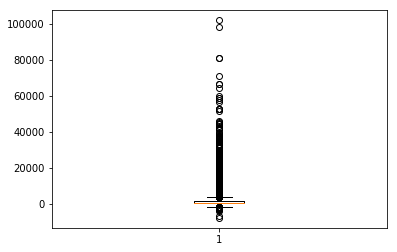

In [22]:
import matplotlib.pyplot as plt
data = df["balance"].values
plt.boxplot(np.array(data).astype(np.float))
plt.show()

In [12]:
# 2) Data Restructuring - Data Value Changes
# Cleaning dirty data 

# Missing Data -> Change "unknown" to NaN
df = df.replace('unknown',np.nan)
print("* Missing data before removal *")
print("Total data : ",len(df))
df.isnull().sum()
df = df.dropna() # Delete Missing Data
print("* Missing data after removal *")
print("Total data : ",len(df))
df.isnull().sum() # Check Missing Data

# Outliers
df = df[df["balance"]<=40000]
df = df[df["balance"]>=-500]

# Delete Redundancy
print("* data before removing redundancy *",len(df))
df = df.drop_duplicates()
print("* data after removing redundancy *",len(df))
print(df.head(10))

* Missing data before removal *
Total data :  45211
* Missing data after removal *
Total data :  43193
* data before removing redundancy * 42498
* data after removing redundancy * 38476
    age           job   marital  education default housing loan  balance
0    58    management   married   tertiary      no     yes   no   2143.0
1    44    technician    single  secondary      no     yes   no     29.0
2    33  entrepreneur   married  secondary      no     yes  yes      2.0
5    35    management   married   tertiary      no     yes   no    231.0
6    28    management    single   tertiary      no     yes  yes    447.0
7    42  entrepreneur  divorced   tertiary     yes     yes   no      2.0
8    58       retired   married    primary      no     yes   no    121.0
9    43    technician    single  secondary      no     yes   no    593.0
10   41        admin.  divorced  secondary      no     yes   no    270.0
11   29        admin.    single  secondary      no     yes   no    390.0


In [13]:
# 3) Feature Engineering - Feature Creation
# Label Encoding
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
labelEncoder.fit(df['job'])
df['job'] = labelEncoder.transform(df['job'])

labelEncoder.fit(df['marital'])
df['marital'] = labelEncoder.transform(df['marital'])

labelEncoder.fit(df['education'])
df['education'] = labelEncoder.transform(df['education'])

labelEncoder.fit(df['default'])
df['default'] = labelEncoder.transform(df['default'])

labelEncoder.fit(df['housing'])
df['housing'] = labelEncoder.transform(df['housing'])

labelEncoder.fit(df['loan'])
df['loan'] = labelEncoder.transform(df['loan'])

feature = df.drop(columns=['marital'])
label = df["marital"]
print(label)

0        1
1        2
2        1
5        1
6        2
7        0
8        1
9        2
10       0
11       2
12       1
14       1
15       1
17       1
18       1
19       1
20       1
21       1
22       2
23       1
24       1
25       1
26       2
27       1
28       2
29       2
30       1
31       1
32       1
33       1
        ..
45156    1
45161    1
45164    1
45165    1
45166    2
45167    1
45169    1
45170    2
45171    2
45176    1
45177    0
45179    1
45187    2
45188    2
45190    1
45191    0
45192    2
45196    2
45197    2
45198    1
45199    2
45200    1
45201    1
45202    2
45203    2
45205    2
45206    1
45207    0
45209    1
45210    1
Name: marital, Length: 38476, dtype: int64


In [14]:
# Data value changes - Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature = scaler.fit_transform(feature)
print(feature)

[[0.51948052 0.4        1.         ... 1.         0.         0.06626551]
 [0.33766234 0.9        0.5        ... 1.         0.         0.01326313]
 [0.19480519 0.2        0.5        ... 1.         1.         0.01258619]
 ...
 [0.68831169 0.5        0.         ... 0.         0.         0.05588567]
 [0.50649351 0.1        0.5        ... 0.         0.         0.02928419]
 [0.24675325 0.2        0.5        ... 0.         0.         0.0870252 ]]


In [15]:
# split dataset into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(feature,label, test_size=0.3, random_state=0)
print(x_train)

[[0.19480519 0.2        0.5        ... 0.         1.         0.01118215]
 [0.48051948 0.4        1.         ... 0.         0.         0.02615018]
 [0.22077922 0.4        1.         ... 1.         0.         0.08745142]
 ...
 [0.15584416 0.7        1.         ... 1.         0.         0.01268647]
 [0.45454545 0.1        0.         ... 0.         0.         0.15301492]
 [0.48051948 0.6        0.5        ... 1.         0.         0.07789896]]


In [16]:
# 3) Feature Engineering - Feature Reduction
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=4) # 7 columns -> 4 columns
x_train = pca.fit_transform(x_train)
print(x_train)

In [17]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

decision_param = {'criterion' : ['gini', 'entropy'],
                  'min_samples_split' : [2, 10, 20],
                 'max_depth' : [1, 5, 10, 15],
                  'min_samples_leaf' : [1, 5, 10],
                  'max_leaf_nodes' : [5, 10, 20, 30, 40, 50],
                 'random_state' : [30, 50, 100]}

# Build three classifier
decision = DecisionTreeClassifier()

# Bulid GridSearchCV which find the parameter combination with the highest score
grid_decision = GridSearchCV(decision, param_grid = decision_param, scoring = 'accuracy', cv = 5)

# Training Decision Tree GridSearchCV
grid_decision.fit(x_train, y_train)

# The highest score and the best parameter combination
print("* Decision Tree *")
print("Best Parameter :", grid_decision.best_estimator_) # return the best combination parameter
print("High Score :", grid_decision.best_score_) # return the best parameter with the highest score

# Test GridSearchCV using test data set
y_pred_decision = grid_decision.best_estimator_.predict(x_test)

* Decision Tree *
Best Parameter : DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=40,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=30,
            splitter='best')
High Score : 0.6666542902758698


In [ ]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

# Logistic Regression Parameter
logistic_param = {'solver' : ['liblinear', 'lbfgs', 'sag'],
                  'max_iter' : [50, 100, 200]}

# Build logisticRegression classifier
logistic = LogisticRegression()

# Bulid GridSearchCV which find the parameter combination with the highest score
grid_logistic = GridSearchCV(logistic, param_grid = logistic_param, scoring = 'accuracy', cv = 10)

# Training Decision Tree GridSearchCV
grid_logistic.fit(x_train, y_train)

# The highest score and the best parameter combination
print("\n* Logistic Regression *")
print("Best Parameter :", grid_logistic.best_estimator_) # return the best combination parameter
print("High Score :", grid_logistic.best_score_) # return the best parameter with the highest score

# Test GridSearchCV using test data set
y_pred_logistic = grid_logistic.best_estimator_.predict(x_test)

In [178]:
# SVM

from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV

svm_param = {'kernel' : ['linear','rbf','sigmoid'],
                 'gamma' : [10, 100],
                 'C' : [0.1, 1.0, 10.0]}

# Build svm classifier
svm = SVC()

# Bulid GridSearchCV which find the parameter combination with the highest score
grid_svm = GridSearchCV(svm, param_grid = svm_param, scoring = 'accuracy', cv = 10)

# Training Decision Tree GridSearchCV
grid_svm.fit(x_train, y_train)

# The highest score and the best parameter combination
print("\n* SVM *")
print("Best Parameter :", grid_svm.best_estimator_) # return the best combination parameter
print("High Score :", grid_svm.best_score_) # return the best parameter with the highest score

# Test GridSearchCV using test data set
y_pred_svm = grid_svm.best_estimator_.predict(x_test)


* SVM *
Best Parameter : SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
High Score : 0.7555742887249737


11505
10169


In [23]:
# Score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

print("** Decision Tree **")
print(classification_report(y_test, y_pred_decision, target_names=['class 0', 'class 1', 'class 2']))

print("** Logistic Regression **")
print(classification_report(y_test, y_pred_logistic, target_names=['class 0', 'class 1', 'class 2']))

print("** SVM **")
print(classification_report(y_test, y_pred_svm, target_names=['class 0', 'class 1', 'class 2']))

score = []
score.append(grid_decision.best_score_)
score.append(grid_logistic.best_score_)
score.append(grid_svm.best_score_)

classifier = ['Decision Tree', 'Logistic Regression', 'SVM']
plt.bar(classifier, score)
plt.show()

** Decision Tree **
             precision    recall  f1-score   support

    class 0       0.50      0.00      0.00      1355
    class 1       0.67      0.89      0.77      6911
    class 2       0.64      0.46      0.54      3277

avg / total       0.64      0.66      0.61     11543



In [24]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_decision))
print(confusion_matrix(y_test, y_pred_logistic))
print(confusion_matrix(y_test, y_pred_svm))

[[   2 1263   90]
 [   2 6167  742]
 [   0 1772 1505]]
